In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import ElasticNet
from sklearn.utils.fixes import sp_version, parse_version
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [88]:
# data preprocessing

df.drop(['Unnamed: 0','key'],axis =1,inplace = True)
df.fillna(method='ffill', inplace=True)
df.drop(df[df['fare_amount'].values<=0].index,inplace=True)
df.drop(df[df['passenger_count']>10].index,inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [89]:
# basic preparation

model_metrics = {}
algos = ["Linear regression", "Lasso regression", "Ridge regression", "Polynomial regression", "Principle Component Regression", "Random Forest", "PLSRegression", "Elastic Net"]
predicts = []
r2_list = []
rmse_list = []

X = df[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_week']]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# helper function

def Result(model_type, y_pred):
    r2 = r2_score(y_test, y_pred)
    predicts.append(y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    print(f"R-squared : {r2}, RMSE : {rmse}")
    model_metrics[model_type] = {'R-squared': r2, 'RMSE': rmse}

In [91]:
# Linear regression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred_linear = linear_reg_model.predict(X_test)
Result("Linear Regression", y_pred_linear)

R-squared : 0.0001853947909385978, RMSE : 9.739644782551816


In [92]:
# Lasso regression

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
Result("Lasso Regression", y_pred_lasso)

R-squared : 3.3612371346580794e-05, RMSE : 9.740384044982056


In [93]:
# Ridge regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
Result("Ridge Regression", y_pred_ridge)

R-squared : 0.00018539496001879208, RMSE : 9.739644781728273


In [94]:
# Polynomial regression

degree = 1
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linear_poly_model = LinearRegression()
linear_poly_model.fit(X_train_poly, y_train)
y_pred_poly = linear_poly_model.predict(X_test_poly)
Result("Polynomial Regression", y_pred_poly)

R-squared : 0.0001853947909385978, RMSE : 9.739644782551816


In [95]:
# Principle Component Regression

n_components = 6
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
linear_pca_model = LinearRegression()
linear_pca_model.fit(X_train_pca, y_train)
y_pred_pca = linear_pca_model.predict(X_test_pca)
Result("Principle Component Regression", y_pred_pca)

R-squared : 0.0001853947909385978, RMSE : 9.739644782551816


In [96]:
# # Quantile Regressor

# solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"
# quantile_model = QuantileRegressor(alpha=0, solver=solver)
# quantile_model.fit(X_train, y_train)
# y_pred_quantile = quantile_model.predict(X_test)
# Result("Quantile Regressor", y_pred_quantile)

In [97]:
# Random Forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=linear_reg_model.predict(X_test)
Result("Random Forest", y_pred_rf)

R-squared : 0.0001853947909385978, RMSE : 9.739644782551816


In [98]:
# PLSRegression

pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)
y_pred_pls = pls_model.predict(X_test)

Result("PLSRegression", y_pred_pls)

R-squared : 0.0002669698002579768, RMSE : 9.73924744497718


In [99]:
# Elastic Net

elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
y_pred_elastic = elastic_net_model.predict(X_test)

Result("Elastic Net", y_pred_elastic)

R-squared : 6.623837311992009e-05, RMSE : 9.740225143451346


In [100]:
r_df = pd.DataFrame(model_metrics)
print(r_df)

           Linear Regression  Lasso Regression  Ridge Regression  \
R-squared           0.000185          0.000034          0.000185   
RMSE                9.739645          9.740384          9.739645   

           Polynomial Regression  Principle Component Regression  \
R-squared               0.000185                        0.000185   
RMSE                    9.739645                        9.739645   

           Random Forest  PLSRegression  Elastic Net  
R-squared       0.000185       0.000267     0.000066  
RMSE            9.739645       9.739247     9.740225  


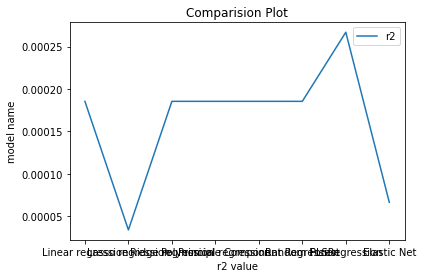

In [110]:
plt.plot(algos, r2_list, linestyle='-', label="r2")
plt.title('Comparision Plot')
plt.xlabel('r2 value')
plt.ylabel('model name')
plt.legend()
plt.show()

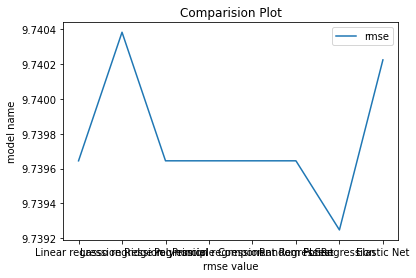

In [111]:
plt.plot(algos, rmse_list, linestyle='-', label="rmse")
plt.title('Comparision Plot')
plt.xlabel('rmse value')
plt.ylabel('model name')
plt.legend()
plt.show()

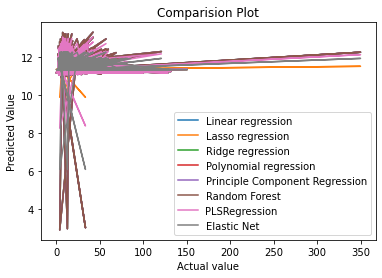

In [108]:
for i in range(len(algos)):
    plt.plot(y_test, predicts[i], linestyle='-', label=algos[i])

plt.title('Comparision Plot')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()